#  Load libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Load data(csv) file

In [2]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv('iris.csv',names=names)
dataset.shape

(150, 5)

In [3]:
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Find number of missing value in indivisual column

In [4]:
dataset.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
dataset["class"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

# Plotting of dataset

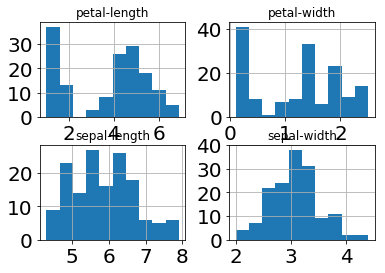

In [8]:
dataset.hist(xlabelsize=20,ylabelsize=20,bins=10)
plt.show()

# scatter plot matrix

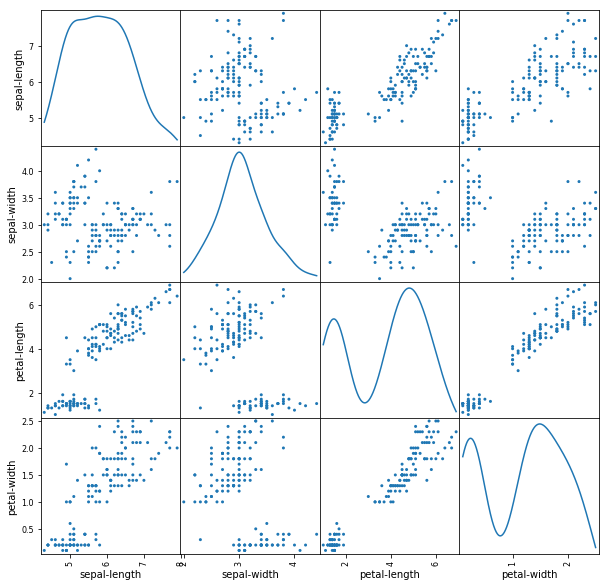

In [9]:
scatter_matrix(dataset,diagonal='kde',alpha=1.0,figsize=(10.0,10.0))
plt.show()

# Spliting dataset into train and test dataset

In [10]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.4)

# KNN model prediction

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
Y_predict= knn.predict(X_test)
print(knn.score(X_train,Y_train))
print(accuracy_score(Y_test, Y_predict))
print(confusion_matrix(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict))

0.9555555555555556
0.9833333333333333
[[18  0  0]
 [ 0 20  0]
 [ 0  1 21]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.95      1.00      0.98        20
 Iris-virginica       1.00      0.95      0.98        22

    avg / total       0.98      0.98      0.98        60



In [12]:
# Make predictions on validation dataset
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
print(knn.score(X_train,Y_train))
print(accuracy_score(Y_test, Y_predict))
print(confusion_matrix(Y_test,Y_predict))
print(classification_report(Y_test, Y_predict))

1.0
0.9666666666666667
[[18  0  0]
 [ 0 20  0]
 [ 0  2 20]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.91      1.00      0.95        20
 Iris-virginica       1.00      0.91      0.95        22

    avg / total       0.97      0.97      0.97        60



# parameter tuning for KNN to find best k-value

Text(0,0.5,'Testing accuracy')

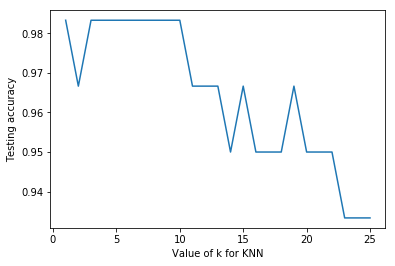

In [13]:
k_range=range(1,26)
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_predict = knn.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_predict))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing accuracy')

For better testing accuracy value of k must lie in range of 4 to 9

# LogisticRegression classifier

In [13]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print(clf.score(X_train, Y_train))
print(accuracy_score(Y_test, Y_predict))
print(confusion_matrix(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict))

0.9444444444444444
0.9166666666666666
[[18  0  0]
 [ 0 17  3]
 [ 0  2 20]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.89      0.85      0.87        20
 Iris-virginica       0.87      0.91      0.89        22

    avg / total       0.92      0.92      0.92        60



# GaussianNB classifier

In [14]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print(clf.score(X_train, Y_train))
print(accuracy_score(Y_test, Y_predict))
print(confusion_matrix(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict))

0.9555555555555556
0.95
[[18  0  0]
 [ 0 19  1]
 [ 0  2 20]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.90      0.95      0.93        20
 Iris-virginica       0.95      0.91      0.93        22

    avg / total       0.95      0.95      0.95        60



# Support vector machine classifier

In [15]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print(clf.score(X_train, Y_train))
print(accuracy_score(Y_test, Y_predict))
print(confusion_matrix(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict))

0.9777777777777777
1.0
[[18  0  0]
 [ 0 20  0]
 [ 0  0 22]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        22

    avg / total       1.00      1.00      1.00        60



# DecisionTreeClassifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print(clf.score(X_train, Y_train))
print(accuracy_score(Y_test, Y_predict))
print(confusion_matrix(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict))

1.0
0.95
[[18  0  0]
 [ 0 20  0]
 [ 0  3 19]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.87      1.00      0.93        20
 Iris-virginica       1.00      0.86      0.93        22

    avg / total       0.96      0.95      0.95        60



On the basis of above models testing accuracy it can be concluded that KNN algorithm was best for IRIS flower classification.

# Making prediction on out of sample data

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,Y)
knn.predict([[3,5,4,2]])

array(['Iris-versicolor'], dtype=object)

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,Y)
knn.predict([[6.8,5,8,10]])

array(['Iris-virginica'], dtype=object)

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,Y)
knn.predict([[.5,5,1.5,2]])

array(['Iris-setosa'], dtype=object)